<h1> GDP Analysis for India </h1>
    <h2>ASSIGNMENT</h2>

### Problem Statement:

- Part-I: GDP Analysis of Indian States:

    Part1A: Need to Analyze the growth rate of GDP of Indian States & Union Territories to get an overview on the
  performance of each states and union territories.
 
    Part1B:  Need to Analyze Total contribution of Primary, Secondary, Tertiary sectors to India's GDP (State-wise).Also differentiate the sector into 4 categories and analysis their Contirbution to Indian states based on the per capita GDP.

- Part-II: GDP and Education Drop-out Rates:

    Here, we need to analyze and showcase the relationship between dropout rates in each education level and per capita GDP is investigated.


#### Importing all the necessary Liberaries required in executing the queries in this Document

In [88]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

<h2>Part 1 :GDP Analysis of Indian States!</h2>

### Part 1 A
<h3>Importing and Understanding the Data !</h3>

In [89]:
#Importing data set in jupyter
#Note:the path of loading the data set is local to my Machine. please change it to the location where your data set is stored.

df1_a= pd.read_csv("Data-I-A-Download.csv")

In [90]:
#Display data set information.
df1_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

In [91]:
#Display all columns of Dataframe
df1_a.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal1', 'Andaman & Nicobar Islands',
       'Chandigarh', 'Delhi', 'Puducherry', 'All_India GDP'],
      dtype='object')

In [92]:
#Displaying table
df1_a.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


<h3>Data Cleaning !!</h3>

<p>Some columns have large number of missing values. Let's check each column and treat the missing vlaues</p>

In [93]:
#Display % of total NULL values in each column
round(100*(df1_a.isnull().sum()/len(df1_a.index)),2)

Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telangana                      0.00
Tripura                     

<p>As per the Problem Statement we need to remove the Row "(% Growth over previous year) and GSDP - CURRENT PRICES (` in Crore)" for year 2016-17</p>

<p>Also if we notice above, the State "West Bengal1" is having 100% NULL values, hence we proceed to drop the West Bengal1 column from the dataset.</p>

In [94]:
#Removing rows (% Growth over previous year) and GSDP - CURRENT PRICES (` in Crore) for year 2016-17.
df1_a=df1_a[df1_a.Duration !="2016-17"]

In [95]:
#Droping "West Bengal1" column as it has 100% missing values.
df1_a.drop('West Bengal1', axis=1,inplace=True)

<h4>After droping the West Bengal1 column, let's check the % of missing vlaues in each column now.</h4>

In [96]:
round(100*(df1_a.isnull().sum()/len(df1_a.index)),2)

Items  Description            0.00
Duration                      0.00
Andhra Pradesh                0.00
Arunachal Pradesh             0.00
Assam                         0.00
Bihar                         0.00
Chhattisgarh                  0.00
Goa                           0.00
Gujarat                       0.00
Haryana                       0.00
Himachal Pradesh             22.22
Jammu & Kashmir               0.00
Jharkhand                     0.00
Karnataka                     0.00
Kerala                        0.00
Madhya Pradesh                0.00
Maharashtra                  22.22
Manipur                      22.22
Meghalaya                     0.00
Mizoram                      22.22
Nagaland                     22.22
Odisha                        0.00
Punjab                       22.22
Rajasthan                    22.22
Sikkim                        0.00
Tamil Nadu                    0.00
Telangana                     0.00
Tripura                      22.22
Uttar Pradesh       

<p>As we know there are tow type of rows in the dataset for diffierent years. hence splitting the dataset into two different dataframes:</p>
<ul>
<li>df1 : Containing rows of GSDP - CURRENT PRICES (` in Crore) for all the years present in dataset. </li>
<li>df2 : Containing rows of % Growth over previous year for all the years present in dataset. </li>

In [97]:
#splitting the data frame into different df1 and df2 for GSDP - CURRENT PRICES (` in Crore) and (% Growth over previous year)
df1=df1_a.iloc[0:5,]
df1.is_copy=False

df2=df1_a.iloc[5:10,]
df2.is_copy=False

C:\Users\kruti\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\kruti\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


<h4>Imputing Mean values in place of NaN values in both df1 and df2</h4>

In [98]:
df1

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


In [99]:
#Imputing all null values in df1(containing GSDP - CURRENT PRICES (` in Crore)) with mean of years 2011-12,2012-13,2013-14,2014-15,2015-16 for all the data.
df1.loc[np.isnan(df1['Himachal Pradesh']),['Himachal Pradesh']]=df1['Himachal Pradesh'].mean()
df1.loc[np.isnan(df1['Maharashtra']),['Maharashtra']]=df1['Maharashtra'].mean()
df1.loc[np.isnan(df1['Manipur']),['Manipur']]=df1['Manipur'].mean()
df1.loc[np.isnan(df1['Mizoram']),['Mizoram']]=df1['Mizoram'].mean()
df1.loc[np.isnan(df1['Nagaland']),['Nagaland']]=df1['Nagaland'].mean()
df1.loc[np.isnan(df1['Punjab']),['Punjab']]=df1['Punjab'].mean()
df1.loc[np.isnan(df1['Rajasthan']),['Rajasthan']]=df1['Rajasthan'].mean()
df1.loc[np.isnan(df1['Tripura']),['Tripura']]=df1['Tripura'].mean()
df1.loc[np.isnan(df1['Andaman & Nicobar Islands']),['Andaman & Nicobar Islands']]=df1['Andaman & Nicobar Islands'].mean()

#Imputing all null values in df2(containing % Growth over previous year data) with mean of years 2011-12,2012-13,2013-14,2014-15,2015-16 for all the data.
df2.loc[np.isnan(df2['Himachal Pradesh']),['Himachal Pradesh']]=df2['Himachal Pradesh'].mean()
df2.loc[np.isnan(df2['Maharashtra']),['Maharashtra']]=df2['Maharashtra'].mean()
df2.loc[np.isnan(df2['Manipur']),['Manipur']]=df2['Manipur'].mean()
df2.loc[np.isnan(df2['Mizoram']),['Mizoram']]=df2['Mizoram'].mean()
df2.loc[np.isnan(df2['Nagaland']),['Nagaland']]=df2['Nagaland'].mean()
df2.loc[np.isnan(df2['Punjab']),['Punjab']]=df2['Punjab'].mean()
df2.loc[np.isnan(df2['Rajasthan']),['Rajasthan']]=df2['Rajasthan'].mean()
df2.loc[np.isnan(df2['Tripura']),['Tripura']]=df2['Tripura'].mean()
df2.loc[np.isnan(df2['Andaman & Nicobar Islands']),['Andaman & Nicobar Islands']]=df2['Andaman & Nicobar Islands'].mean()

#### Modifying the Dataset df2 further to plot Average growth of states
<ul>
    <li>Creating a new Dataframe df3 and perform below operations, so that we have the original data saved in df2 dataframe</li>
    <li>Setting index to 'Duration' and removing the 'Item Description column as not needed further</li>
    <li>Transposing the dataset</li>
    <li>Creating a new Column "Average" containing the average for years 2013-14,2014-15 and 2015-16 for all the states</li>
    <li>Resetting the index of dataset df2</li>
    <li>Sorting the Dataset df3 by increasing Average</li>

In [100]:
#Display dataframe df2.
df2

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.780000,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.140000,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.920000,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,15.613333,10.58,13.65,12.90,8.84,12.09,10.15,9.99


In [101]:
#Setting index to 'Duration' and Dropping the 'Items Desctiption' column as it is not needed.
df3=df2.set_index(['Duration'])
df3=df3.drop('Items  Description', axis=1)

In [102]:
#Display the dataframe df3
df3

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
Duration,,,,,,,,,,,,,,,,,,,,,
2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.890000,11.31,...,13.84,11.70,12.780000,13.65,14.12,11.13,15.14,13.81,12.23,13.86
2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.420000,10.09,...,13.51,12.63,18.140000,14.73,13.64,16.68,14.71,13.43,15.87,12.97
2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.140000,4.70,...,12.51,13.05,15.920000,10.51,8.12,10.89,12.33,10.96,10.14,10.65
2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,12.816667,17.91,...,10.99,12.61,15.613333,10.58,13.65,12.90,8.84,12.09,10.15,9.99


In [103]:
#Transposing the dataset df3
df3=df3.transpose()

In [104]:
#Calculating average growth of states over duration 2013-14,2014-15,2015-16.
df3["Average"] = df3[['2013-14','2014-15','2015-16']].mean(axis=1)
df3

Duration,2012-13,2013-14,2014-15,2015-16,Average
Andhra Pradesh,8.43,12.85,13.40,15.850000,14.033333
Arunachal Pradesh,13.41,16.38,14.79,12.070000,14.413333
Assam,9.56,13.31,11.45,13.190000,12.650000
Bihar,14.25,12.30,17.92,10.590000,13.603333
Chhattisgarh,12.30,16.44,13.69,10.980000,13.703333
Goa,-10.02,-5.77,13.12,10.750000,6.033333
Gujarat,17.69,11.47,10.82,11.090000,11.126667
Haryana,16.63,15.45,9.18,10.910000,11.846667
Himachal Pradesh,13.89,14.42,10.14,12.816667,12.458889
Jammu & Kashmir,11.31,10.09,4.70,17.910000,10.900000


In [105]:
#Resetting the index.
df3=df3.reset_index()

In [106]:
#Sorting according to increasing average.
df3=df3.sort_values(by='Average', ascending=True)

In [107]:
#Display Final dataframe df3
df3

Duration,index,2012-13,2013-14,2014-15,2015-16,Average
5,Goa,-10.02,-5.77,13.12,10.750000,6.033333
16,Meghalaya,9.81,4.87,6.41,9.580000,6.953333
19,Odisha,13.34,12.95,10.37,6.190000,9.836667
22,Sikkim,10.51,12.35,9.72,9.390000,10.486667
9,Jammu & Kashmir,11.31,10.09,4.70,17.910000,10.900000
6,Gujarat,17.69,11.47,10.82,11.090000,11.126667
32,All_India GDP,13.86,12.97,10.65,9.990000,11.203333
20,Punjab,11.67,12.42,9.95,11.346667,11.238889
10,Jharkhand,15.77,7.92,15.14,11.440000,11.500000
21,Rajasthan,13.18,11.27,11.37,11.940000,11.526667


<h3>Data Analysis!!!</h3>
<h4>Plotting the Average growth of states in barplot.</h4>
<p> Now that we have the required data to plot the Average Growth of states over Duration 2013 to 2016, we proceed further to plot the data in a bra graph.</p>

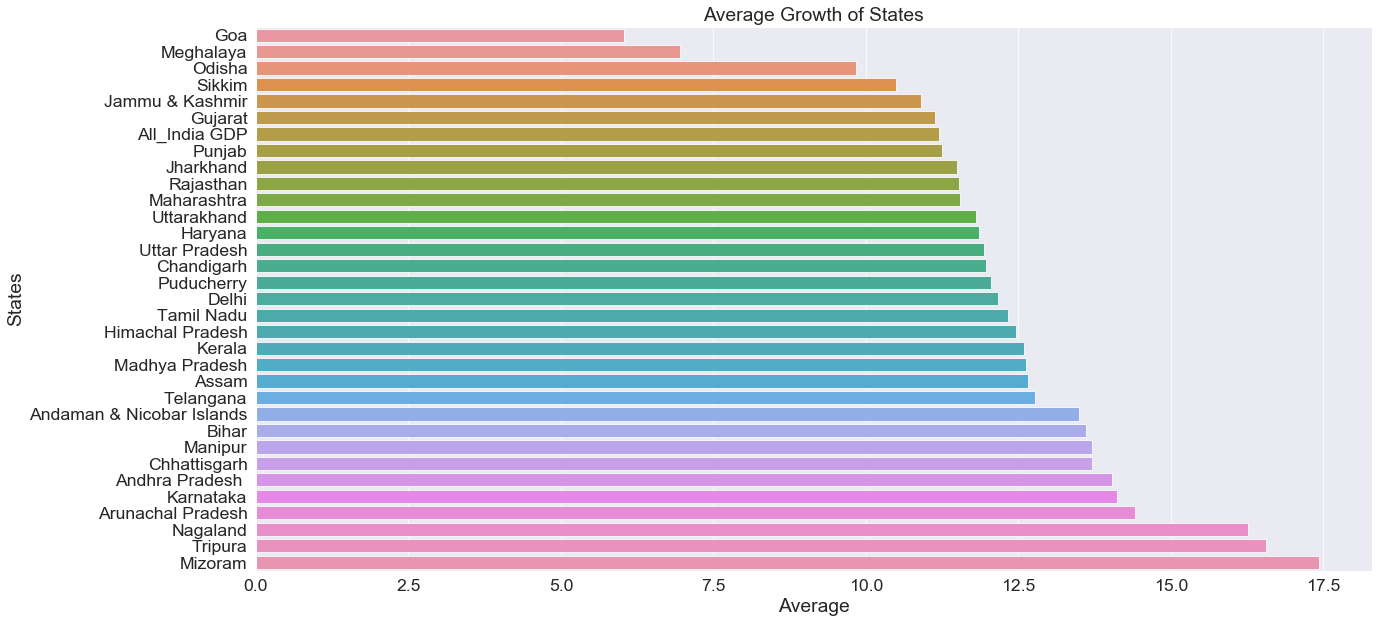

In [108]:
#Plotting the Average growth of states in barplot.

plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale=2)
plt.title('Average Growth of States')
sns.set_style("whitegrid")

sns.barplot(x="Average",y="index", data=df3)
plt.ylabel('States')
plt.xlabel('Average')

plt.show()


<h4>Questions:</h4>
1. Which states have been growing consistently fast, and which ones have been struggling?

As shown in the above figure, the 5 Growing and Struggling states:
<ul>
	<li> Consistently fast growing states : Mizoram, Tripura, Nagaland, Arunachal Pradesh, Chhattisgarh.</li>
    <li>Struggling states : Goa, Meghalaya, Odisha, Sikkim, Jammu & Kashmir.</li>
</ul>
2.  What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

Referring to figure 1, the Average Growth rate of State Maharashtra is 11.54%. In comparison with National Average Growth (i.e. 11.20%) Maharashtra’s average Growth rate is lesser than 0.33%.

<h3>Modifying the Dataset df1 further to plot the Total GDP of the States for year 2015-16: </h3>
<h4>Cleaning the dataframe df1 for analysing the Total GDP of the States for year 2015-16</h4>
<ul>
    <li>Creating a new Dataframe df4 and perform below operations, so that we have the original data saved in df1 dataframe</li>
    <li>Setting index to 'Duration' and removing the 'Item Description column as not needed further</li>
    <li>Transposing the dataset</li>
    <li>Resetting the index of dataset df4</li>
    <li>Removing the row of 'All_India GDP' as it is not required further</li>
    <li>Sorting the Dataset df4 by year '2015-16' in increasing order</li>

In [109]:
#Displaying the dataframe df1
df1

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,751485.0,359433.0,19208.00,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,855481.0,401493.0,21663.00,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,971090.0,452186.0,25593.00,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,1092564.0,511178.0,29667.00,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,1212668.0,575631.0,24032.75,1153795.0,184091.0,4820.0,30304.0,551963.0,26533.0,13675331.0


In [110]:
#setting index to "Durarion"
df4=df1.set_index(['Duration'])
df4=df4.drop('Items  Description', axis=1)

In [111]:
#Transposing the dataframe df4
df4=df4.transpose()

In [112]:
#Resetting the index.
df4=df4.reset_index()
df4

Duration,index,2011-12,2012-13,2013-14,2014-15,2015-16
0,Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.00
1,Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.00
2,Assam,143175.0,156864.0,177745.0,198098.0,224234.00
3,Bihar,247144.0,282368.0,317101.0,373920.0,413503.00
4,Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.00
5,Goa,42367.0,38120.0,35921.0,40633.0,45002.00
6,Gujarat,615606.0,724495.0,807623.0,895027.0,994316.00
7,Haryana,297539.0,347032.0,400662.0,437462.0,485184.00
8,Himachal Pradesh,72720.0,82820.0,94764.0,104369.0,88668.25
9,Jammu & Kashmir,78254.0,87105.0,95893.0,100404.0,118387.00


In [113]:
#delete 'All_India GDP row' as it is not needed.
df4=df4.drop(32)

In [114]:
#sorting the dataframe by year '2015-16' in increasing order.
df4=df4.sort_values(by='2015-16', ascending=True)

<h3>Data Analysis -for Total GDP of states for year 2015-16 </h3>
<h4>Plotting the Total GDP of States for year 2015-16 in barplot.</h4>
<p> Now that we have the required data to plot the Total GDP of States for year 2015-16, we proceed further to plot the data in a bra graph.</p>

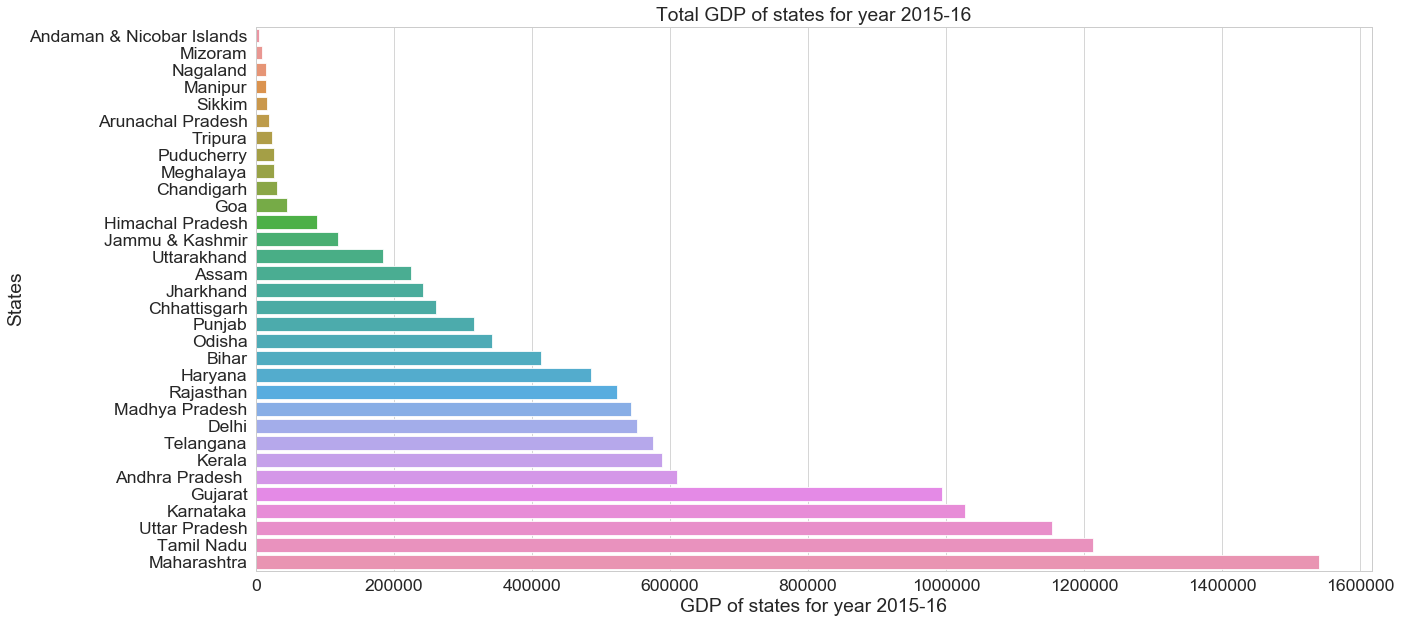

In [115]:
#Plotting "Total GDP of states for year 2015-16" in barplot.
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale=2)
plt.title('Total GDP of states for year 2015-16')
sns.set_style("whitegrid")

sns.barplot(x='2015-16',y='index', data=df4)
plt.ylabel('States')
plt.xlabel('GDP of states for year 2015-16')

plt.show()

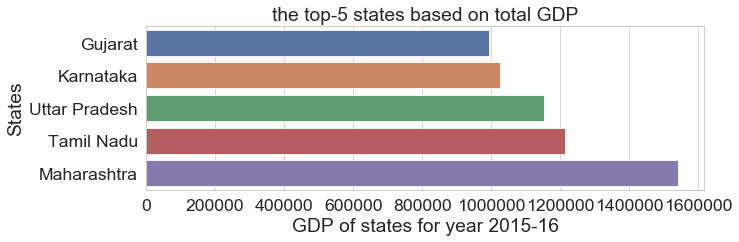

In [116]:
#Plotting "the top-5 states based on total GDP" in barplot.
plt.figure(figsize=(10,3))
sns.set_context("paper", font_scale=2)
plt.title('the top-5 states based on total GDP')
sns.set_style("whitegrid")

sns.barplot(x='2015-16',y='index', data=df4.tail())
plt.ylabel('States')
plt.xlabel('GDP of states for year 2015-16')

plt.show()


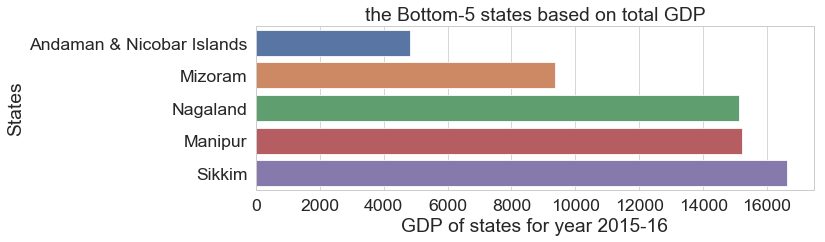

In [117]:
##Plotting "the bottom-5 states based on total GDP" in barplot.

plt.figure(figsize=(10,3))
sns.set_context("paper", font_scale=2)
plt.title('the Bottom-5 states based on total GDP')
sns.set_style("whitegrid")

sns.barplot(x='2015-16',y='index', data=df4.head())
plt.ylabel('States')
plt.xlabel('GDP of states for year 2015-16')

plt.show()

Hense, as per the above graphs,the top-5 and the bottom-5 states based on total GDP are listed below:
	
    Top 5 States:
        Maharashtra
        Tamil Nadu
        Uttar Pradesh
        Karnataka
        Gujarat
	Bottom 5 States:
        Andaman & Nicobar Islands
        Mizoram
        Nagaland
        Manipur
        Sikkim

<h2>PART 1 B:</h2>

In [118]:
#Importing the DataSets of various states and merging them in a single Dataframe.

path=r"E:/Course 2-statics and EDA/GDP assignment/Part1 B"
all_files=glob.glob(path +"/*.csv")

li=[]

for filename in all_files:
    df= pd.read_csv(filename,index_col=None,header=0,encoding='ISO-8859-1')
    df['State']=filename.split('-')[2]
    li.append(df)
    
GSVA_df=pd.concat(li,axis=0,ignore_index=True,sort=False)

In [119]:
GSVA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
S.No.      990 non-null object
Item       990 non-null object
2011-12    974 non-null float64
2012-13    972 non-null float64
2013-14    973 non-null float64
2014-15    974 non-null float64
2015-16    716 non-null float64
2016-17    326 non-null float64
State      990 non-null object
dtypes: float64(6), object(3)
memory usage: 69.7+ KB


In [120]:
#display various information like count, mean etc of the dataset.
GSVA_df.describe()

,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
count,9.740000e+02,9.720000e+02,9.730000e+02,9.740000e+02,7.160000e+02,3.260000e+02
mean,3.508825e+06,4.004637e+06,4.523449e+06,5.017774e+06,5.659524e+06,6.786961e+06
std,9.896744e+06,1.130848e+07,1.283772e+07,1.420722e+07,1.427816e+07,1.564816e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,-7.600000e+01,0.000000e+00,0.000000e+00
25%,6.358325e+04,7.363975e+04,7.727700e+04,9.039675e+04,1.429752e+05,2.249025e+05
50%,4.458955e+05,5.086485e+05,5.708240e+05,6.343450e+05,8.938970e+05,1.343266e+06
75%,2.501934e+06,2.816273e+06,3.229811e+06,3.635496e+06,4.486930e+06,5.689784e+06
max,1.272967e+08,1.448466e+08,1.647506e+08,1.792122e+08,1.212668e+08,1.338766e+08


In [121]:
#Display data of dataframe.
GSVA_df.head()

,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,State
0,1,"Agriculture, forestry and fishing",9400805.0,11186428.0,12895568.0,14819416.0,17326726.0,20386004.0,Andhra_Pradesh
1,1.1,Crops,5204052.0,6123041.0,7114707.0,7893514.0,8644285.0,9717089.0,Andhra_Pradesh
2,1.2,Livestock,2758776.0,3358438.0,3643026.0,4309078.0,5155487.0,5979648.0,Andhra_Pradesh
3,1.3,Forestry and logging,250314.0,253029.0,280493.0,346160.0,340550.0,335487.0,Andhra_Pradesh
4,1.4,Fishing and aquaculture,1187663.0,1451920.0,1857342.0,2270664.0,3186404.0,4353780.0,Andhra_Pradesh


In [122]:
#Removoing the Union Territories from dataset.
Union_Territories=['Delhi','Chandigarh','Puducherry']
for ut in Union_Territories:
    GSVA_df=GSVA_df[GSVA_df['State']!= ut]

In [123]:
#taking only the required data, i.e, selecting s.No. Item, 2014-15 and State as colunms and saving it is a new dataframe.
df_2014_15=GSVA_df[['Item','2014-15','State']]
df_2014_15.head()

,Item,2014-15,State
0,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh
1,Crops,7893514.0,Andhra_Pradesh
2,Livestock,4309078.0,Andhra_Pradesh
3,Forestry and logging,346160.0,Andhra_Pradesh
4,Fishing and aquaculture,2270664.0,Andhra_Pradesh


In [124]:
#checking if the dataframe df_2014_15 Containing any NULL values.
round(100*(df_2014_15.isnull().sum()/len(df_2014_15.index)), 2)


Item       0.0
2014-15    1.8
State      0.0
dtype: float64

<h4>Removing the rows with NaN values of 2014-15, as the NaN values are present in Sub-Sub Sectors and for the sectors having Null values dont have values in previous years to take Mean.</h4>

In [125]:
df_2014_15=df_2014_15[~(df_2014_15['2014-15'].isnull())]
df_2014_15.isnull().sum()

Item       0
2014-15    0
State      0
dtype: int64

In [126]:
#taking only Per Capita GSDP (Rs.) in different dataframe. 
df_per_capita_states=df_2014_15[df_2014_15['Item']=='Per Capita GSDP (Rs.)']

In [127]:
#sorthing the dataframe by Per Capita GSDP (Rs.) of year 2014-15
df_per_capita_states=df_per_capita_states.sort_values(by='2014-15',ascending=True)

Text(0.5, 0, 'GDP per Capita')

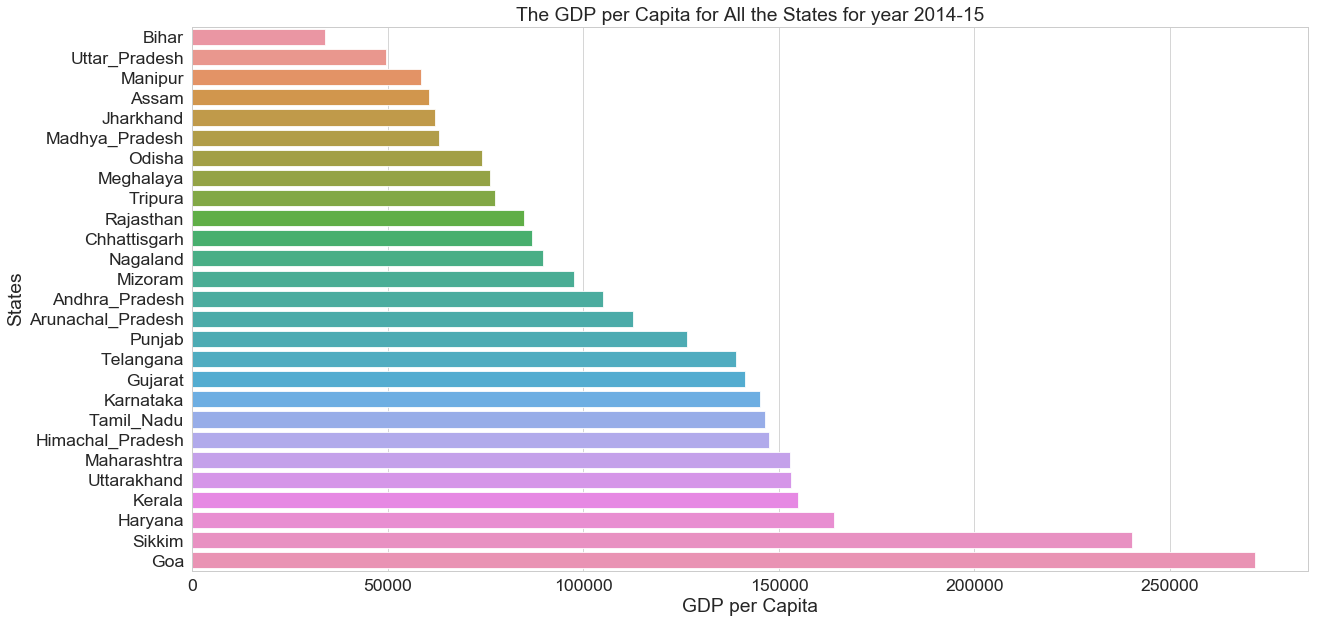

In [128]:
#Plotting "The GDP per Capita for All the States" in barplot.
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale=2)
plt.title('The GDP per Capita for All the States for year 2014-15')
sns.set_style("whitegrid")

sns.barplot(x='2014-15',y='State', data=df_per_capita_states)
plt.ylabel('States')
plt.xlabel('GDP per Capita')

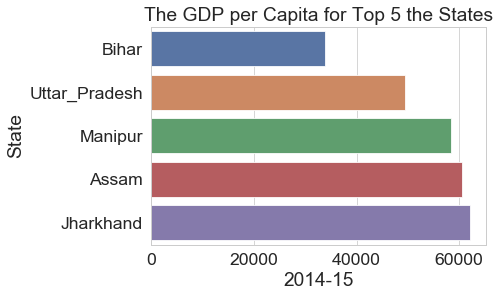

In [129]:
#Plotting The GDP per Capita for Bottom 5 States

plt.title('The GDP per Capita for Top 5 the States')
sns.barplot(x='2014-15',y='State',data=df_per_capita_states.head())
            
plt.show()

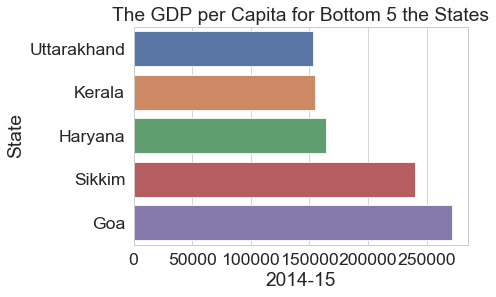

In [130]:
#Plotting The GDP per Capita for Bottom 5 States

plt.title('The GDP per Capita for Bottom 5 the States')
sns.barplot(x='2014-15',y='State',data=df_per_capita_states.tail())
            
plt.show()

<h4>Questions:</h4>
1. Identify the top-5 and the bottom-5 states based on GDP per capita.

As shown in the above figure, the Top 5 and Botton 5 States based on GDP per Capita are listed below:
<ul>
    a. Top 5:
    <li>Goa</li>
    <li>Sikkim</li>
    <li>Haryana</li>
    <li>Kerala</li>
    <li>Uttarakhand</li>
</ul>
<ul>
    b. Botton 5:
    <li>Bihar</li>
    <li>Uttar Pradesh</li>
    <li>Manipur</li>
    <li>Assam</li>
    <li>Jharkhand</li>
</ul>

2. Find the ratio of highest per capita GDP to the lowest per capita GDP.

The ratio of Highest per capita to Lowest per capita value is 271793:33954
    


In [131]:
df_Sector=df_2014_15[df_2014_15['Item'].isin(['Tertiary','Secondary','Primary','Gross State Domestic Product'])]
df_Sector.head()

,Item,2014-15,State
6,Primary,16303716.0,Andhra_Pradesh
10,Secondary,10488884.0,Andhra_Pradesh
26,Tertiary,22032942.0,Andhra_Pradesh
30,Gross State Domestic Product,52646842.0,Andhra_Pradesh
39,Primary,716959.0,Arunachal_Pradesh


In [132]:
df_Sector=df_Sector.pivot(index='State',columns='Item',values='2014-15')

In [133]:
#Percentage Contribution of Primary, Secondary and Tertiary sectors.

df_Sector['Primary Contri %']=(df_Sector['Primary']/df_Sector['Gross State Domestic Product'])*100
df_Sector['Secondary Contri %']=(df_Sector['Secondary']/df_Sector['Gross State Domestic Product'])*100
df_Sector['Tertiary Contri %']=(df_Sector['Tertiary']/df_Sector['Gross State Domestic Product'])*100

df_Sector.head()

Item,Gross State Domestic Product,Primary,Secondary,Tertiary,Primary Contri %,Secondary Contri %,Tertiary Contri %
State,,,,,,,
Andhra_Pradesh,52646842.0,16303716.0,10488884.0,22032942.0,30.968080,19.923102,41.850453
Arunachal_Pradesh,1676119.0,716959.0,287489.0,631844.0,42.774946,17.152064,37.696846
Assam,19809800.0,5326697.0,4033091.0,9307109.0,26.889201,20.359070,46.982347
Bihar,37391988.0,8019997.0,5984896.0,22179969.0,21.448437,16.005825,59.317437
Chhattisgarh,23498180.0,6400817.0,8238886.0,7588778.0,27.239629,35.061805,32.295173


In [134]:
df_Sector_Contri=df_Sector[['Primary Contri %','Secondary Contri %','Tertiary Contri %']]
df_Sector_Contri.head()

Item,Primary Contri %,Secondary Contri %,Tertiary Contri %
State,,,
Andhra_Pradesh,30.968080,19.923102,41.850453
Arunachal_Pradesh,42.774946,17.152064,37.696846
Assam,26.889201,20.359070,46.982347
Bihar,21.448437,16.005825,59.317437
Chhattisgarh,27.239629,35.061805,32.295173


Text(0.5, 62.621875, '% contribution of primary, secondary and tertiary sectors')

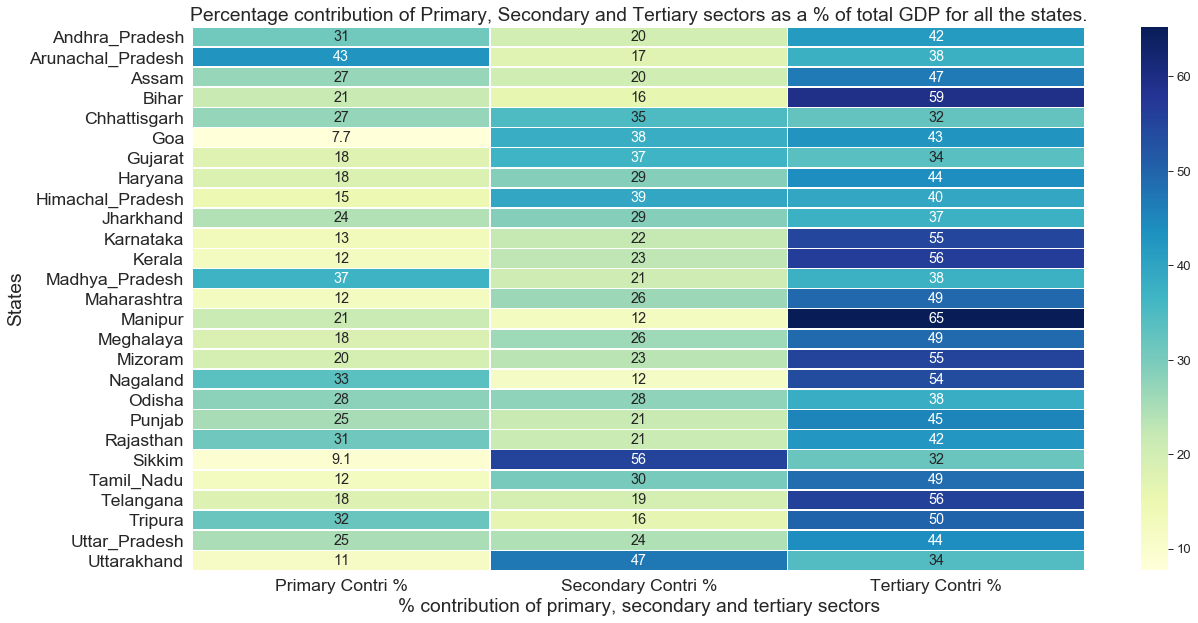

In [135]:
plt.figure(figsize = (20,10))
plt.title('Percentage contribution of Primary, Secondary and Tertiary sectors as a % of total GDP for all the states.')
sns.set_context("paper", font_scale=1.5)
sns.heatmap(df_Sector_Contri, cmap="YlGnBu",square=False,annot=True, linewidths=.5)
plt.ylabel('States')
plt.xlabel('% contribution of primary, secondary and tertiary sectors')

In [136]:
df_per_capita_states.sort_values(by='2014-15',ascending=False,inplace=True)
df_per_capita_states.head()

,Item,2014-15,State
263,Per Capita GSDP (Rs.),271793.0,Goa
824,Per Capita GSDP (Rs.),240274.0,Sikkim
329,Per Capita GSDP (Rs.),164077.0,Haryana
461,Per Capita GSDP (Rs.),154778.0,Kerala
956,Per Capita GSDP (Rs.),153076.0,Uttarakhand


In [137]:
df_per_capita_states['Category']=pd.qcut(df_per_capita_states['2014-15'],[0,0.20,0.5,0.85,1], labels=['C4','C3','C2','C1'])

In [138]:
df_per_capita_states

,Item,2014-15,State,Category
263,Per Capita GSDP (Rs.),271793.0,Goa,C1
824,Per Capita GSDP (Rs.),240274.0,Sikkim,C1
329,Per Capita GSDP (Rs.),164077.0,Haryana,C1
461,Per Capita GSDP (Rs.),154778.0,Kerala,C1
956,Per Capita GSDP (Rs.),153076.0,Uttarakhand,C2
527,Per Capita GSDP (Rs.),152853.0,Maharashtra,C2
362,Per Capita GSDP (Rs.),147330.0,Himachal_Pradesh,C2
857,Per Capita GSDP (Rs.),146503.0,Tamil_Nadu,C2
428,Per Capita GSDP (Rs.),145141.0,Karnataka,C2
296,Per Capita GSDP (Rs.),141263.0,Gujarat,C2


In [139]:
df_category_subsector=pd.merge(df_2014_15,df_per_capita_states, how='outer', on='State')

In [140]:
df_category_subsector.head()

,Item_x,2014-15_x,State,Item_y,2014-15_y,Category
0,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,Per Capita GSDP (Rs.),104977.0,C3
1,Crops,7893514.0,Andhra_Pradesh,Per Capita GSDP (Rs.),104977.0,C3
2,Livestock,4309078.0,Andhra_Pradesh,Per Capita GSDP (Rs.),104977.0,C3
3,Forestry and logging,346160.0,Andhra_Pradesh,Per Capita GSDP (Rs.),104977.0,C3
4,Fishing and aquaculture,2270664.0,Andhra_Pradesh,Per Capita GSDP (Rs.),104977.0,C3


In [141]:
df_category_subsector=df_category_subsector.drop('Item_y',axis=1)
df_category_subsector=df_category_subsector.drop('2014-15_y',axis=1)

In [142]:
df_category_subsector.rename(index=str,columns={'Item_x':'Item','2014-15_x':'2014-15'},inplace=True)
df_category_subsector.head()

,Item,2014-15,State,Category
0,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3
1,Crops,7893514.0,Andhra_Pradesh,C3
2,Livestock,4309078.0,Andhra_Pradesh,C3
3,Forestry and logging,346160.0,Andhra_Pradesh,C3
4,Fishing and aquaculture,2270664.0,Andhra_Pradesh,C3


In [143]:
GSDP_Category=df_category_subsector[df_category_subsector['Item']=='Gross State Domestic Product'].groupby('Category').sum()['2014-15'].values
print(GSDP_Category)

[2.33252066e+08 1.77966387e+08 5.86380452e+08 1.01930677e+08]


In [144]:
# Creating the sub sector list which is required for further analysis

sub_sector= [ 'Agriculture, forestry and fishing',
'Mining and quarrying',
'Manufacturing',
'Electricity, gas, water supply & other utility services',
'Construction',
'Trade, repair, hotels and restaurants',
'Transport, storage, communication & services related to broadcasting',
'Financial services',
'Real estate, ownership of dwelling & professional services',
'Public administration',
'Other services'
]

In [145]:
#Creating sub_sector dataframe having only the sub sectors in it.
df_subSector= df_category_subsector[df_category_subsector['Item'].isin(sub_sector)]
df_subSector.head()

,Item,2014-15,State,Category
0,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh,C3
5,Mining and quarrying,1484300.0,Andhra_Pradesh,C3
7,Manufacturing,4672266.0,Andhra_Pradesh,C3
8,"Electricity, gas, water supply & other utility...",1151729.0,Andhra_Pradesh,C3
9,Construction,4664889.0,Andhra_Pradesh,C3


In [146]:
#Grouping the dataframe by Category and Item column
df_subSector=df_subSector.groupby(['Category','Item']).sum()
df_subSector.head()

2014-15
Category Item                                                          
C4       Agriculture, forestry and fishing                   56735044.0
         Construction                                        22775948.0
         Electricity, gas, water supply & other utility ...   4310264.0
         Financial services                                   7684498.0
         Manufacturing                                       24987032.0

In [147]:
# Calculating total GSDP for each category
GSDP_cat_total=df_subSector.index.get_level_values(0).map(dict(zip(['C1','C2','C3','C4'],GSDP_Category)))

In [148]:
#Calculating total contribution (in %) and adding it in the new column "Contri%" in the dataframe.

df_subSector['Contri%']=(df_subSector['2014-15']/GSDP_cat_total )*100
df_subSector.sort_values(['Category','Contri%'], ascending=[True,False],inplace=True)

df_subSector.head()

2014-15  \
Category Item                                                             
C4       Agriculture, forestry and fishing                   56735044.0   
         Trade, repair, hotels and restaurants               27484595.0   
         Manufacturing                                       24987032.0   
         Real estate, ownership of dwelling & profession...  24177534.0   
         Construction                                        22775948.0   

                                                             Contri%  
Category Item                                                         
C4       Agriculture, forestry and fishing                   55.6604  
         Trade, repair, hotels and restaurants                26.964  
         Manufacturing                                       24.5138  
         Real estate, ownership of dwelling & profession...  23.7196  
         Construction                                        22.3445

In [149]:
#finding the top 3/4/5 Sectors contributing to 80%.

def top(category):
    index=sum(df_subSector.loc[category]['Contri%'].cumsum(axis = 0) < 80)+1
    df_top_Category=df_subSector.loc[category].iloc[:index,1]
    df_top_Category.name=category
    return df_top_Category

In [150]:
df_top_C1=top('C1')
df_top_C2=top('C2')
df_top_C3=top('C3')
df_top_C4=top('C4')

In [151]:
final_top_cat_contri=pd.concat([df_top_C1,df_top_C2,df_top_C3,df_top_C4],axis=1,sort=False)
final_top_cat_contri

,C1,C2,C3,C4
"Real estate, ownership of dwelling & professional services",6.31945,51.7634,2.76682,NaN
"Agriculture, forestry and fishing",6.17007,NaN,7.20128,55.6604
"Trade, repair, hotels and restaurants",6.00002,NaN,2.94098,26.964
Manufacturing,5.89868,61.358,3.75837,NaN
Construction,4.8293,NaN,2.67879,NaN
Other services,3.45546,NaN,2.18551,NaN
"Transport, storage, communication & services related to broadcasting",2.92326,NaN,2.08593,NaN
Financial services,1.68765,NaN,0.983359,NaN
Public administration,1.53109,NaN,1.35188,NaN
"Electricity, gas, water supply & other utility services",0.857869,NaN,0.785288,NaN


<Figure size 1200x600 with 0 Axes>

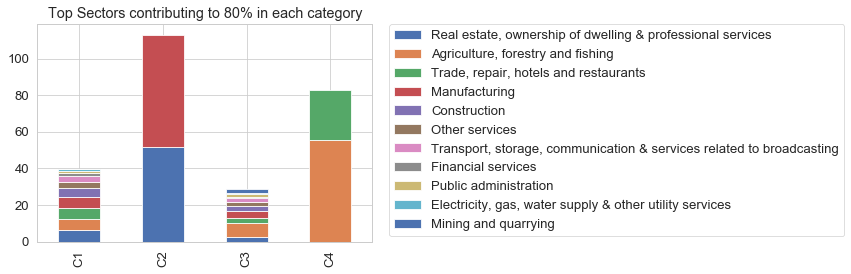

In [168]:
plt.figure(num=None,figsize=(20,10),dpi=60,facecolor='w',edgecolor='k')
ax=final_top_cat_contri.transpose().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

ax.set_title('Top Sectors contributing to 80% in each category')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    
plt.show()

<h3>Plotting the contribution of the sub-sectors as a percentage of the GSDP of each category.</h3>

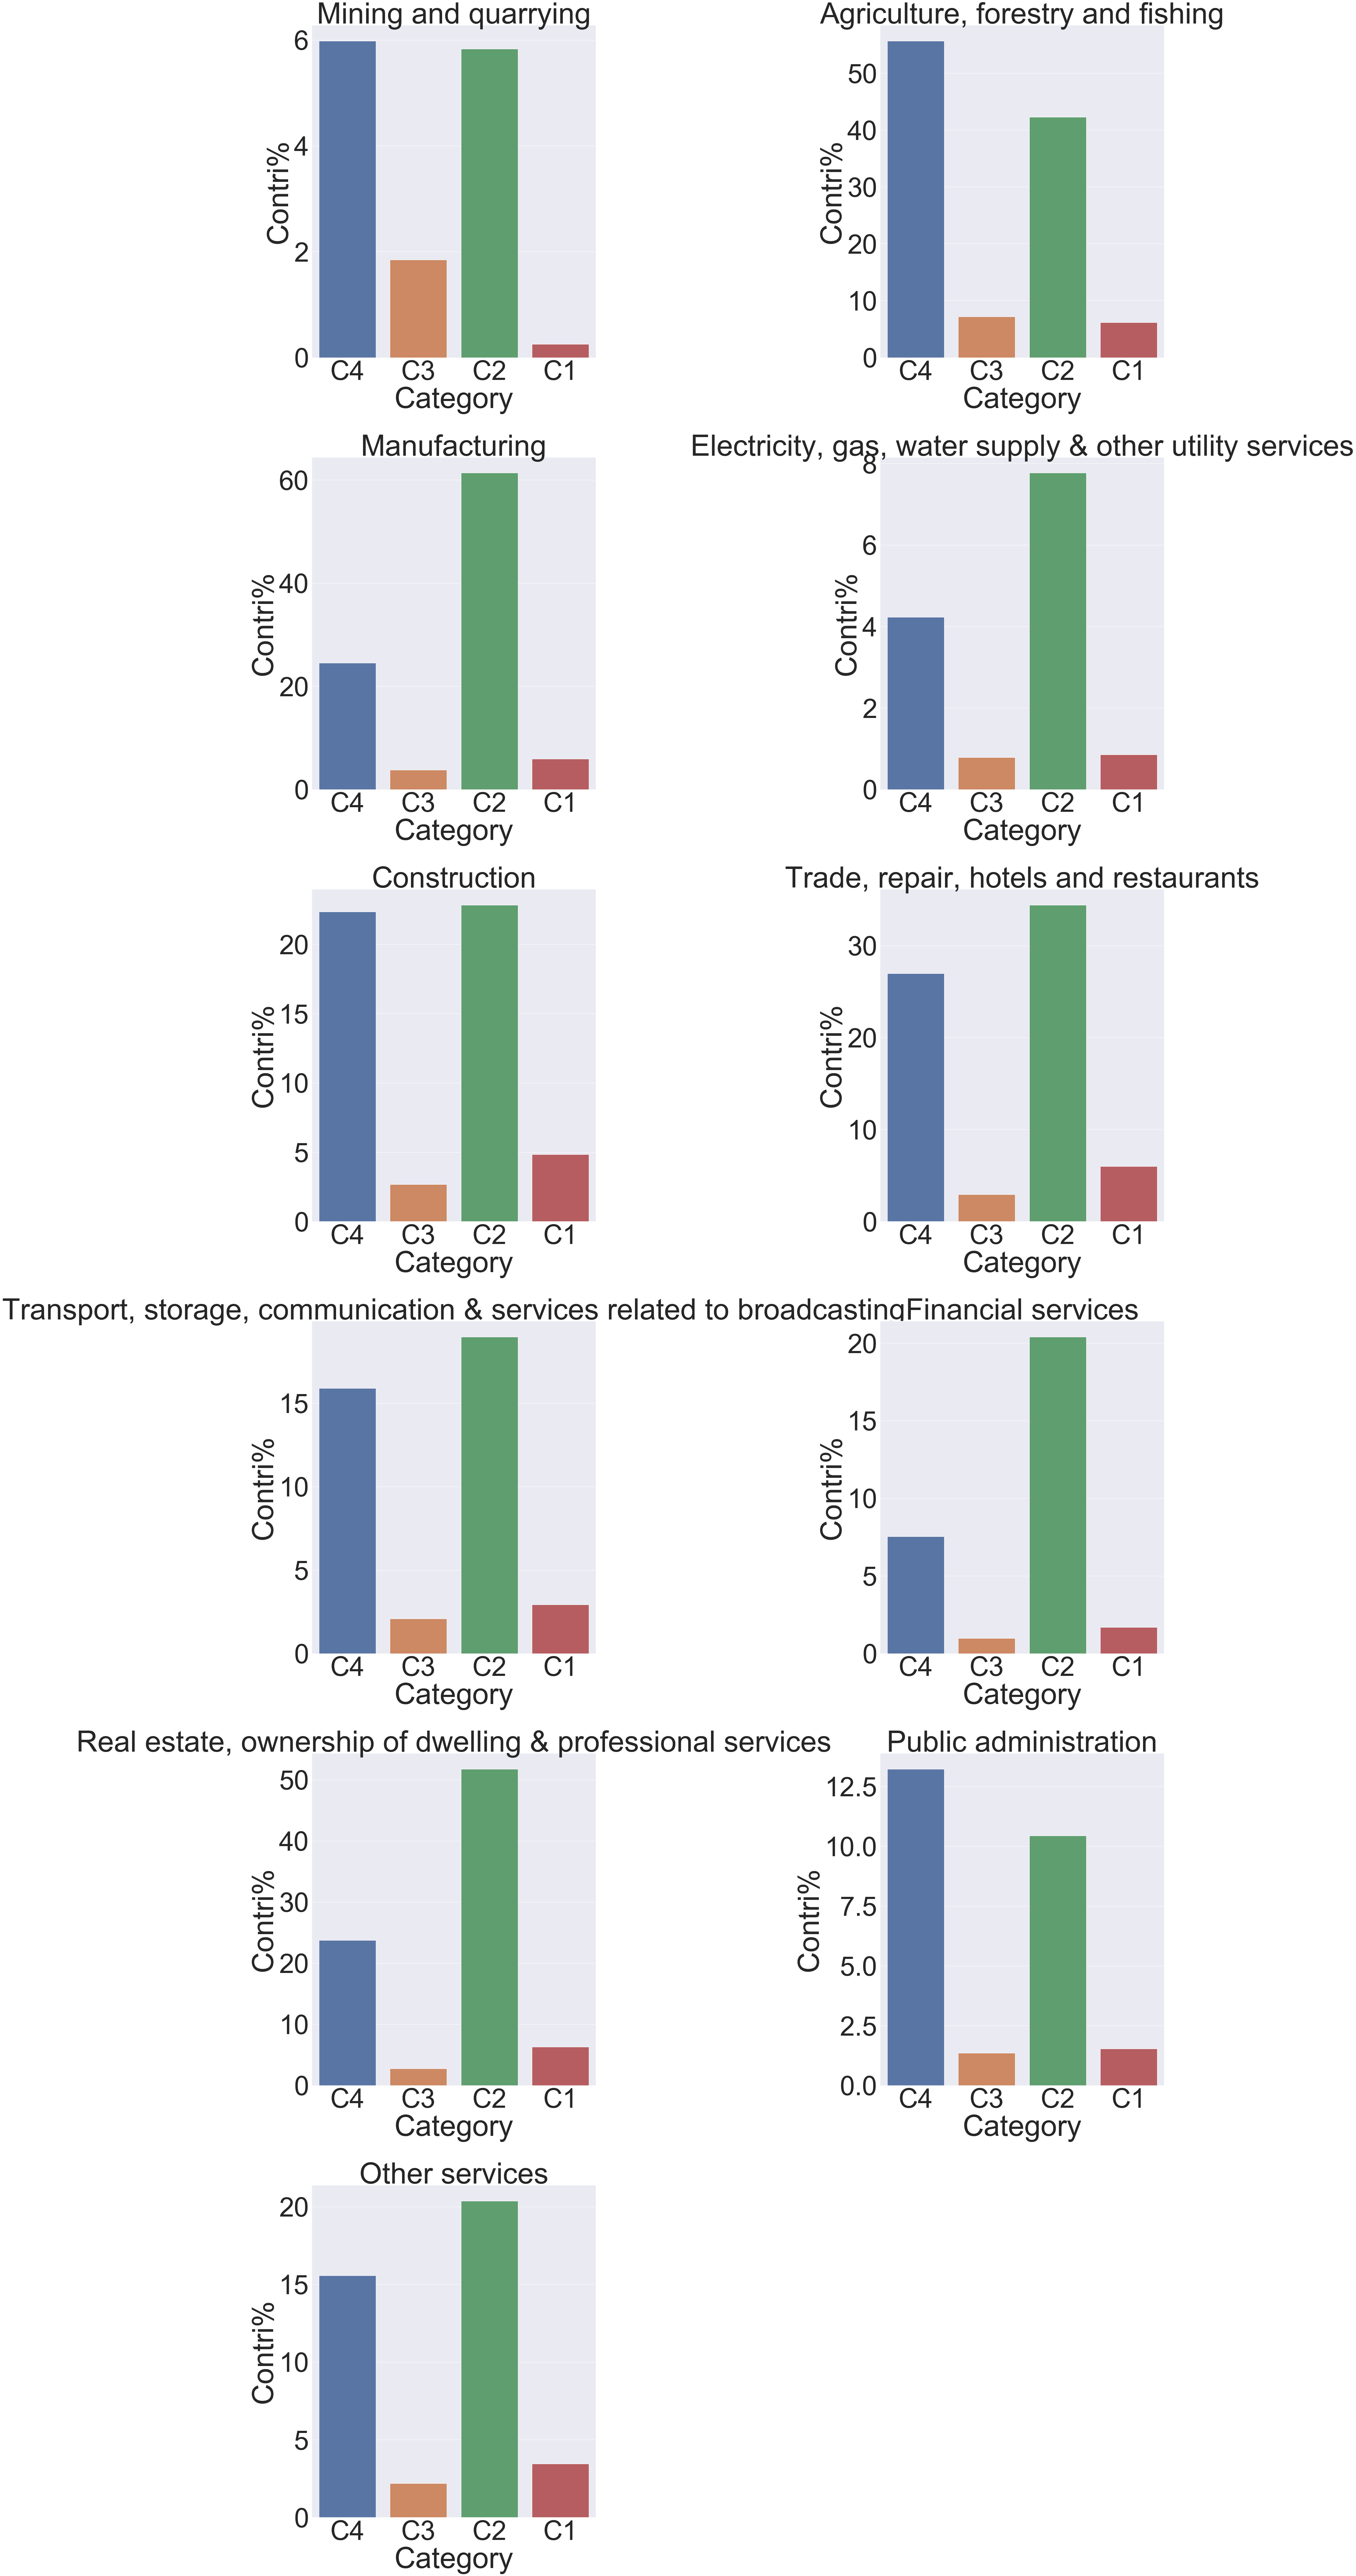

In [169]:
#here we are using Subplot from matplotlib, so that each sub-sector is plotted in row and column wise, and it becomes easier to compare the data.

plt.figure(1, figsize=(50,150))

sns.set(font_scale=8)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.3)

plt.subplot(6,2,1)
plt.title('Mining and quarrying')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Mining and quarrying']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,2)
plt.title('Agriculture, forestry and fishing')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Agriculture, forestry and fishing']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,3)
plt.title('Manufacturing')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Manufacturing']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,4)
plt.title('Electricity, gas, water supply & other utility services')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Electricity, gas, water supply & other utility services']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,5)
plt.title('Construction')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Construction']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,6)
plt.title('Trade, repair, hotels and restaurants')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Trade, repair, hotels and restaurants']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,7)
plt.title('Transport, storage, communication & services related to broadcasting')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Transport, storage, communication & services related to broadcasting']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,8)
plt.title('Financial services')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Financial services']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,9)
plt.title('Real estate, ownership of dwelling & professional services')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Real estate, ownership of dwelling & professional services']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,10)
plt.title('Public administration')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Public administration']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)

plt.subplot(6,2,11)
plt.title('Other services')
temp=df_subSector[df_subSector.index.get_level_values(1)=='Other services']
ax = sns.barplot(x=temp.index.get_level_values(0),y='Contri%',data=temp)


##### The above bar plot shows the contribution of the sub-sectors as a percentage of the GSDP of each category.

##### Observations:

We have total 11 sub sectors, where in the Category C2 and C4 tends to contribute maximum percentage of the GSDP as compared to C1 and C3 in each sub-sectors.

Referring stacked Bar plot showing “the Top sectors contributing total of 80% of the GSDP.

- For Category 4 (quantile lower than 0.2) Top Sub-Sectors that are contributing for almost 80% of the total GDP are:
	> Agriculture,
	Trade and Repair,
	Manufacturing,
	Other Services,
	Construction,
	Real Estate , ownership etc.
- For Category 3 (quantile between 0.2 and o.5 ) Top Sub-Sectors that are contributing for almost 80% of the total GDP are:
	>Agriculture,
	Manufacturing,
	Trade and Repair,
	Other Services,
	Public Administration,
	Construction.

- For Category 2 (quantile between 0.5 and o.85 ) Top Sub-Sectors that are contributing for almost 80% of the total GDP are:
	>Agriculture,
	Manufacturing,
	Rea Estate and ownership,
	Trade and Repair,
	Other Services,
	Construction.
    
- For Category 1 (quantile between 0.85 and 1 ) Top Sub-Sectors that are contributing for almost 80% of the total GDP are:
	>Manufacturing,
	Agriculture,
	Real Estate and ownership,
	Trade & Repair etc.
	Construction,
	Other Services.

##### Two Recommendations to Increase the GDP per capita :

1. In Category 1, the main focus is in Manufacturing , if the focus is slightly shifted to other sub sector like , Agriculture and Real Estate, the per capita GDP may increase
2. If the same strategy is carried out in Category 2 and Category 3 , then also the per capita GDP would rise.


<h1>PART II : GDP and Education Drop-out Rates!</h1>

#### Reading the CSV file into jyputer notebook

In [170]:
#reading the CVS file into a dataframe.

Drop_out_df=pd.read_csv('Data-II-Download.csv')

In [171]:
#Displaying information about the Drop_out dataset.

Drop_out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
Sl. No.                         37 non-null object
Level of Education - State      37 non-null object
Primary - 2012-2013             29 non-null float64
Primary - 2014-2015             33 non-null float64
Primary - 2014-2015.1           31 non-null float64
Upper Primary - 2012-2013       31 non-null float64
Upper Primary - 2013-2014       35 non-null float64
Upper Primary - 2014-2015       35 non-null float64
Secondary - 2012-2013           34 non-null float64
Secondary - 2013-2014           36 non-null float64
Secondary - 2014-2015           36 non-null float64
Senior Secondary - 2012-2013    24 non-null float64
Senior Secondary - 2013-2014    27 non-null float64
Senior Secondary - 2014-2015    28 non-null float64
dtypes: float64(12), object(2)
memory usage: 4.1+ KB


In [172]:
#displaying few data of Drop_ut dataset.

Drop_out_df.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


### Data Cleaning 

In [173]:
#taking the columns for year 2014-15, as we need to do analysis for the year 2014-15 only.

Drop_out_2014_15=Drop_out_df[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']]
Drop_out_2014_15

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
0,A & N Islands,1.21,1.69,9.870,16.93
1,Andhra Pradesh,4.35,5.20,15.710,NaN
2,Arunachal Pradesh,10.89,6.71,17.110,18.42
3,Assam,7.44,10.51,27.060,NaN
4,Bihar,2.09,4.08,25.900,NaN
5,Chandigarh,NaN,0.44,NaN,10.55
6,Chhatisgarh,1.42,5.85,21.260,2.76
7,Dadra & Nagar Haveli,1.57,4.02,16.770,9.47
8,Daman & Diu,0.85,3.11,32.270,40.48
9,Delhi,NaN,0.76,11.810,17.32


In [174]:
#creating list of the states and union Territories wtich were not present in the data set of Part 1 B.

ut_nonState=['All India',
             'A & N Islands',
             'Chandigarh',
             'Dadra & Nagar Haveli',
             'Daman & Diu',
             'Delhi',
             'Lakshadweep',
             'Puducherry',
             'West Bengal',
             'Jammu and Kashmir']

In [175]:
#removing Union Terriroties and states which were not present in Data of Part 1 B.

Drop_out_2014_15=Drop_out_2014_15[~(Drop_out_2014_15['Level of Education - State'].isin(ut_nonState))]

In [176]:
df_per_capita_states.set_index('State', drop = True, inplace = True)

In [177]:
#setting index to "Level of Education - State"
Drop_out_2014_15.set_index('Level of Education - State', inplace=True)

In [178]:
df_per_capita_states.index=df_per_capita_states.index.str.replace("_", " ")

In [179]:
df_per_capita_states

,Item,2014-15,Category
State,,,
Goa,Per Capita GSDP (Rs.),271793.0,C1
Sikkim,Per Capita GSDP (Rs.),240274.0,C1
Haryana,Per Capita GSDP (Rs.),164077.0,C1
Kerala,Per Capita GSDP (Rs.),154778.0,C1
Uttarakhand,Per Capita GSDP (Rs.),153076.0,C2
Maharashtra,Per Capita GSDP (Rs.),152853.0,C2
Himachal Pradesh,Per Capita GSDP (Rs.),147330.0,C2
Tamil Nadu,Per Capita GSDP (Rs.),146503.0,C2
Karnataka,Per Capita GSDP (Rs.),145141.0,C2


In [180]:
Drop_out_2014_15.rename(index = {'Chhatisgarh':'Chhattisgarh','Uttrakhand':'Uttarakhand'}, inplace = True)
Drop_out_2014_15

C:\Users\kruti\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
Level of Education - State,,,,
Andhra Pradesh,4.35,5.20,15.71,NaN
Arunachal Pradesh,10.89,6.71,17.11,18.42
Assam,7.44,10.51,27.06,NaN
Bihar,2.09,4.08,25.90,NaN
Chhattisgarh,1.42,5.85,21.26,2.76
Goa,0.20,0.07,11.15,13.91
Gujarat,0.76,6.41,25.04,7.04
Haryana,0.41,5.81,15.89,5.75
Himachal Pradesh,0.46,0.87,6.07,7.41


In [181]:
final_df=pd.concat([Drop_out_2014_15, df_per_capita_states], axis = 1)

C:\Users\kruti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [182]:
final_df

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,Item,2014-15,Category
Andhra Pradesh,4.35,5.20,15.71,NaN,Per Capita GSDP (Rs.),104977.0,C3
Arunachal Pradesh,10.89,6.71,17.11,18.42,Per Capita GSDP (Rs.),112718.0,C2
Assam,7.44,10.51,27.06,NaN,Per Capita GSDP (Rs.),60621.0,C4
Bihar,2.09,4.08,25.90,NaN,Per Capita GSDP (Rs.),33954.0,C4
Chhattisgarh,1.42,5.85,21.26,2.76,Per Capita GSDP (Rs.),86860.0,C3
Goa,0.20,0.07,11.15,13.91,Per Capita GSDP (Rs.),271793.0,C1
Gujarat,0.76,6.41,25.04,7.04,Per Capita GSDP (Rs.),141263.0,C2
Haryana,0.41,5.81,15.89,5.75,Per Capita GSDP (Rs.),164077.0,C1
Himachal Pradesh,0.46,0.87,6.07,7.41,Per Capita GSDP (Rs.),147330.0,C2
Jharkhand,6.41,8.99,24.00,3.41,Per Capita GSDP (Rs.),62091.0,C4


In [183]:
final_df.rename(columns = {'2014-15':'Per Capita GDP'}, inplace=True)

In [184]:
final_df.drop(['Item','Category','Senior Secondary - 2014-2015'],axis=1,inplace=True)

In [185]:
final_df

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GDP
Andhra Pradesh,4.35,5.20,15.71,104977.0
Arunachal Pradesh,10.89,6.71,17.11,112718.0
Assam,7.44,10.51,27.06,60621.0
Bihar,2.09,4.08,25.90,33954.0
Chhattisgarh,1.42,5.85,21.26,86860.0
Goa,0.20,0.07,11.15,271793.0
Gujarat,0.76,6.41,25.04,141263.0
Haryana,0.41,5.81,15.89,164077.0
Himachal Pradesh,0.46,0.87,6.07,147330.0
Jharkhand,6.41,8.99,24.00,62091.0


In [186]:
#checking for NULL values in the rows of dataframe.

final_df.isnull().sum(axis=1)

Andhra Pradesh       0
Arunachal Pradesh    0
Assam                0
Bihar                0
Chhattisgarh         0
Goa                  0
Gujarat              0
Haryana              0
Himachal Pradesh     0
Jharkhand            0
Karnataka            0
Kerala               2
Madhya Pradesh       0
Maharashtra          0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Odisha               0
Punjab               0
Rajasthan            0
Sikkim               0
Tamil Nadu           1
Telangana            0
Tripura              0
Uttar Pradesh        0
Uttarakhand          0
dtype: int64

In [187]:
Drop_out_final=final_df.corr()

In [188]:
Drop_out_final

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GDP
Primary - 2014-2015,1.000000,0.437074,0.126865,-0.455350
Upper Primary - 2014-2015,0.437074,1.000000,0.549114,-0.542732
Secondary - 2014-2015,0.126865,0.549114,1.000000,-0.465649
Per Capita GDP,-0.455350,-0.542732,-0.465649,1.000000


#### Plotting the HeatMap for comparision of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states.

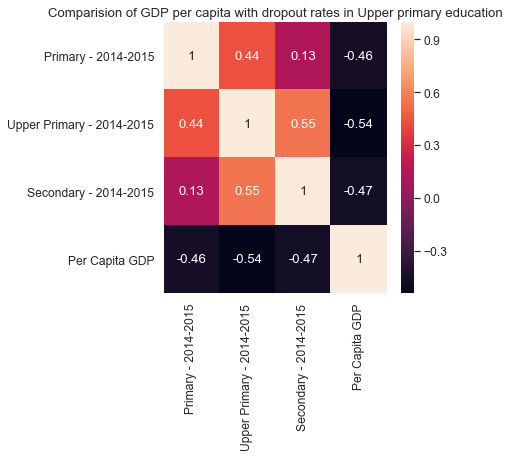

In [189]:
plt.figure(num=None,figsize=(5,5))
sns.set(font_scale=1.1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

plt.title('Comparision of GDP per capita with dropout rates in Upper primary education')
sns.heatmap(Drop_out_final[['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Per Capita GDP']],annot=True)

plt.show()

Referring the above HeatMap, we can say that the Dropout rate increases as the the GDP Per Capita decrease.

#### Hypothesis :
    1. Dropout rates affecting the GDP as education may lead to increase the percentage of in getting Jobs is higher Sector.
    
    2. Per Capita GDP is affecting the by Dropout rates

### ----END---